In [323]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [324]:
corpus=["In a small, cupboard under the stairs, lived a young boy named Harry Potter. Unbeknownst to him, he was no ordinary boy but a wizard. On his eleventh birthday, Harry received a letter from a messenger owl, inviting him to attend Hogwarts School of Witchcraft and Wizardry. Excitement and adventure awaited him as he embarked on a journey to discover his magical abilities and learn about the world of wizards and magical creatures. Alongside his newfound friends Ron Weasley and Hermione Granger, Harry faced challenges, solved mysteries, and encountered the dark forces of the wizarding world, particularly the dark wizard Lord Voldemort. The story unfolds with magic, friendship, and the timeless battle between good and evil."]

In [325]:
corpus = [sent.split(" ") for sent in corpus]
corpus

[['In',
  'a',
  'small,',
  'cupboard',
  'under',
  'the',
  'stairs,',
  'lived',
  'a',
  'young',
  'boy',
  'named',
  'Harry',
  'Potter.',
  'Unbeknownst',
  'to',
  'him,',
  'he',
  'was',
  'no',
  'ordinary',
  'boy',
  'but',
  'a',
  'wizard.',
  'On',
  'his',
  'eleventh',
  'birthday,',
  'Harry',
  'received',
  'a',
  'letter',
  'from',
  'a',
  'messenger',
  'owl,',
  'inviting',
  'him',
  'to',
  'attend',
  'Hogwarts',
  'School',
  'of',
  'Witchcraft',
  'and',
  'Wizardry.',
  'Excitement',
  'and',
  'adventure',
  'awaited',
  'him',
  'as',
  'he',
  'embarked',
  'on',
  'a',
  'journey',
  'to',
  'discover',
  'his',
  'magical',
  'abilities',
  'and',
  'learn',
  'about',
  'the',
  'world',
  'of',
  'wizards',
  'and',
  'magical',
  'creatures.',
  'Alongside',
  'his',
  'newfound',
  'friends',
  'Ron',
  'Weasley',
  'and',
  'Hermione',
  'Granger,',
  'Harry',
  'faced',
  'challenges,',
  'solved',
  'mysteries,',
  'and',
  'encountered',


In [326]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him']

In [327]:
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'Hogwarts': 0, 'wizard.': 1, 'On': 2, 'wizarding': 3, 'inviting': 4, 'the': 5, 'no': 6, 'world,': 7, 'encountered': 8, 'magic,': 9, 'Weasley': 10, 'abilities': 11, 'School': 12, 'faced': 13, 'on': 14, 'of': 15, 'wizard': 16, 'about': 17, 'small,': 18, 'under': 19, 'newfound': 20, 'world': 21, 'mysteries,': 22, 'wizards': 23, 'letter': 24, 'to': 25, 'solved': 26, 'from': 27, 'forces': 28, 'messenger': 29, 'discover': 30, 'creatures.': 31, 'him,': 32, 'journey': 33, 'Hermione': 34, 'a': 35, 'particularly': 36, 'In': 37, 'boy': 38, 'embarked': 39, 'The': 40, 'ordinary': 41, 'stairs,': 42, 'Ron': 43, 'Excitement': 44, 'good': 45, 'but': 46, 'magical': 47, 'was': 48, 'evil.': 49, 'Voldemort.': 50, 'timeless': 51, 'battle': 52, 'owl,': 53, 'dark': 54, 'Alongside': 55, 'between': 56, 'awaited': 57, 'adventure': 58, 'attend': 59, 'challenges,': 60, 'friends': 61, 'Unbeknownst': 62, 'lived': 63, 'learn': 64, 'with': 65, 'cupboard': 66, 'received': 67, 'eleventh': 68, 'Harry': 69, 'young': 70, 

In [328]:
voc_size = len(vocab)
print(voc_size)

86


In [329]:
vocab.append('<UNK>')

In [330]:
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him',
 '<UNK>']

In [331]:
word2index['<UNK>'] = 0

In [332]:
index2word = {v:k for k, v in word2index.items()} 

In [333]:
for c in corpus:
    print(c)

['In', 'a', 'small,', 'cupboard', 'under', 'the', 'stairs,', 'lived', 'a', 'young', 'boy', 'named', 'Harry', 'Potter.', 'Unbeknownst', 'to', 'him,', 'he', 'was', 'no', 'ordinary', 'boy', 'but', 'a', 'wizard.', 'On', 'his', 'eleventh', 'birthday,', 'Harry', 'received', 'a', 'letter', 'from', 'a', 'messenger', 'owl,', 'inviting', 'him', 'to', 'attend', 'Hogwarts', 'School', 'of', 'Witchcraft', 'and', 'Wizardry.', 'Excitement', 'and', 'adventure', 'awaited', 'him', 'as', 'he', 'embarked', 'on', 'a', 'journey', 'to', 'discover', 'his', 'magical', 'abilities', 'and', 'learn', 'about', 'the', 'world', 'of', 'wizards', 'and', 'magical', 'creatures.', 'Alongside', 'his', 'newfound', 'friends', 'Ron', 'Weasley', 'and', 'Hermione', 'Granger,', 'Harry', 'faced', 'challenges,', 'solved', 'mysteries,', 'and', 'encountered', 'the', 'dark', 'forces', 'of', 'the', 'wizarding', 'world,', 'particularly', 'the', 'dark', 'wizard', 'Lord', 'Voldemort.', 'The', 'story', 'unfolds', 'with', 'magic,', 'friends

In [334]:
def random_batch(batch_size, corpus):
    w_size=2
    skipgrams = []

    #loop each corpus
    for doc in corpus:
        #look from the 2nd word until second last word
        for i in range(w_size, len(doc)-1):
            #center word
            center = word2index[doc[i]]
            #outside words = 2 words
            outside = (word2index[doc[i-1]], word2index[doc[i+1]])
            #for each of these two outside words, we gonna append to a list
            for each_out in outside:
                skipgrams.append([center, each_out])
                #center, outside1;   center, outside2
                
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
    
    inputs, labels = [], []
    for index in random_index:
        inputs.append([skipgrams[index][0]])
        labels.append([skipgrams[index][1]])
        
    return np.array(inputs), np.array(labels)
            
x, y = random_batch(2, corpus)

In [335]:
x

array([[11],
       [30]])

In [336]:
y.shape

(2, 1)

In [337]:
len(vocab)

87

In [338]:
embedding=nn.Embedding(179,2)


In [339]:
x_tensor = torch.LongTensor(x)
embedding(x_tensor).shape

torch.Size([2, 1, 2])

In [340]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center, outside, all_vocabs):
        center_embedding     = self.embedding_center(center)  #(batch_size, 1, emb_size)
        outside_embedding    = self.embedding_outside(outside) #(batch_size, 1, emb_size)
        all_vocabs_embedding = self.embedding_outside(all_vocabs) #(batch_size, voc_size, emb_size)
        
        top_term = torch.exp(outside_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2))
        #batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) = (batch_size, 1) 

        lower_term = all_vocabs_embedding.bmm(center_embedding.transpose(1, 2)).squeeze(2)
        #batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size) 
        
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)  #(batch_size, 1)
        
        loss = -torch.mean(torch.log(top_term / lower_term_sum))  #scalar
        
        return loss

In [341]:
batch_size = 2
voc_size   = len(vocab)

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 87])

In [342]:
model = Skipgram(voc_size, 2)
model

Skipgram(
  (embedding_center): Embedding(87, 2)
  (embedding_outside): Embedding(87, 2)
)

In [343]:
input_tensor = torch.LongTensor(x)
label_tensor = torch.LongTensor(y)

In [344]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [345]:
loss

tensor(5.6674, grad_fn=<NegBackward0>)

In [346]:
batch_size = 2
emb_size   = 2
model      = Skipgram(voc_size, emb_size)
optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [347]:
num_epochs = 10000

for epoch in range(num_epochs):
    
    #get batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_tensor = torch.LongTensor(input_batch)
    label_tensor = torch.LongTensor(label_batch)
    
    #predict
    loss = model(input_tensor, label_tensor, all_vocabs)
    
    #backprogate
    optimizer.zero_grad()
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print the loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1:6.0f} | Loss: {loss:2.6f}")

Epoch   1000 | Loss: 5.345418
Epoch   2000 | Loss: 4.684894
Epoch   3000 | Loss: 4.800433
Epoch   4000 | Loss: 4.175435
Epoch   5000 | Loss: 4.203016
Epoch   6000 | Loss: 4.492420
Epoch   7000 | Loss: 2.720114
Epoch   8000 | Loss: 3.830761
Epoch   9000 | Loss: 4.490171
Epoch  10000 | Loss: 3.121840


In [348]:
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him',
 '<UNK>']

In [349]:
wizard=torch.LongTensor([word2index['wizard']])
wizard

tensor([16])

In [350]:
wizard_em_c=model.embedding_center(wizard)
wizard_em_o=model.embedding_outside(wizard)
wizard_em=(wizard_em_c+wizard_em_o)/2
wizard_em

tensor([[ 0.0309, -0.3873]], grad_fn=<DivBackward0>)

In [351]:
wizard_em_o

tensor([[-0.3399, -0.6028]], grad_fn=<EmbeddingBackward0>)

In [352]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
        
    word = torch.LongTensor([word2index[word]])
    
    embed_c = model.embedding_center(word)
    embed_o = model.embedding_outside(word)
    embed   = (embed_c + embed_o) / 2
    
    return embed[0][0].item(), embed[0][1].item()

In [353]:
get_embed('faced')

(0.43074092268943787, -0.3633840084075928)

In [354]:
get_embed('Weasley')

(-0.23340393602848053, -0.24257899820804596)

In [355]:
get_embed('inviting')

(-0.7248412370681763, 1.5915250778198242)

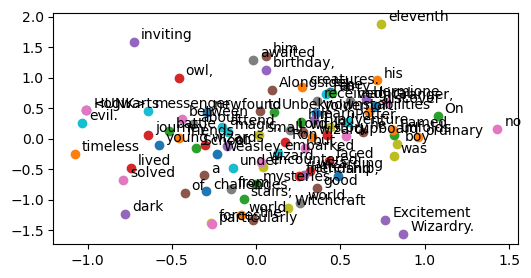

In [356]:
plt.figure(figsize=(6, 3))
for i, word in enumerate(vocab):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [357]:
wizard=get_embed('wizard')
wizard

(0.03093421459197998, -0.38726359605789185)

In [358]:
faced=get_embed('faced')
faced

(0.43074092268943787, -0.3633840084075928)

In [359]:
unk=get_embed('<UNK>')
unk

(-1.0079150199890137, 0.4651910662651062)

In [360]:
np.array(wizard) @ np.array(unk)

-0.21133062469465003

In [361]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_a = np.linalg.norm(A)
    norm_b = np.linalg.norm(B)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

print(cosine_similarity(np.array(wizard), np.array(unk)))
print(cosine_similarity(np.array(wizard), np.array(faced)))

-0.49002383835360896
0.7036286567077155


** Negative Sampling **

In [362]:
z = 0.001

In [363]:
from collections import Counter

word_count = Counter(flatten(corpus))
word_count

#get the total number of words
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

116

In [364]:
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him',
 '<UNK>']

In [365]:
unigram_table = []

for v in vocab:
    uw = word_count[v] / num_total_words
    uw_alpha = int((uw ** 0.75) / z)
    unigram_table.extend([v] * uw_alpha)
    
Counter(unigram_table)

Counter({'and': 134,
         'the': 108,
         'a': 108,
         'of': 64,
         'to': 64,
         'Harry': 64,
         'his': 64,
         'boy': 47,
         'magical': 47,
         'dark': 47,
         'he': 47,
         'him': 47,
         'Hogwarts': 28,
         'wizard.': 28,
         'On': 28,
         'wizarding': 28,
         'inviting': 28,
         'no': 28,
         'world,': 28,
         'encountered': 28,
         'magic,': 28,
         'Weasley': 28,
         'abilities': 28,
         'School': 28,
         'faced': 28,
         'on': 28,
         'wizard': 28,
         'about': 28,
         'small,': 28,
         'under': 28,
         'newfound': 28,
         'world': 28,
         'mysteries,': 28,
         'wizards': 28,
         'letter': 28,
         'solved': 28,
         'from': 28,
         'forces': 28,
         'messenger': 28,
         'discover': 28,
         'creatures.': 28,
         'him,': 28,
         'journey': 28,
         'Hermione': 28,
   

In [366]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index['<UNK>'], seq))
    return torch.LongTensor(idxs)

In [367]:
import random

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.shape[0]
    neg_samples = []
    for i in range(batch_size):  #(1, k)
        target_index = targets[i].item()
        nsample      = []
        while (len(nsample) < k):
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))
        
    return torch.cat(neg_samples)

In [368]:
batch_size = 2
x, y = random_batch(batch_size, corpus)
x_tensor = torch.LongTensor(x)
y_tensor = torch.LongTensor(y)

In [369]:
k = 5
neg_samples = negative_sampling(y_tensor, unigram_table, k)

In [370]:
y_tensor[1]

tensor([29])

In [371]:
neg_samples[1]

tensor([76, 80,  5, 35, 78])

In [372]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside = nn.Embedding(voc_size, emb_size)
        self.logsigmoid        = nn.LogSigmoid()
    
    def forward(self, center, outside, negative):
        #center, outside:  (bs, 1)
        #negative       :  (bs, k)
        
        center_embed   = self.embedding_center(center) #(bs, 1, emb_size)
        outside_embed  = self.embedding_outside(outside) #(bs, 1, emb_size)
        negative_embed = self.embedding_outside(negative) #(bs, k, emb_size)
        
        uovc           = outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2) #(bs, 1)
        ukvc           = -negative_embed.bmm(center_embed.transpose(1, 2)).squeeze(2) #(bs, k)
        ukvc_sum       = torch.sum(ukvc, 1).reshape(-1, 1) #(bs, 1)
        
        loss           = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)
        
        return -torch.mean(loss)

In [373]:
#test your model
emb_size = 2
voc_size = len(vocab)
model = SkipgramNeg(voc_size, emb_size)

In [374]:
loss = model(x_tensor, y_tensor, neg_samples)

In [375]:
loss

tensor(0.3591, grad_fn=<NegBackward0>)

In [376]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [377]:
num_epochs = 10000

for epoch in range(num_epochs):
    
    #get batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_tensor = torch.LongTensor(input_batch)
    label_tensor = torch.LongTensor(label_batch)
    
    #predict
    neg_samples = negative_sampling(label_tensor, unigram_table, k)
    loss = model(input_tensor, label_tensor, neg_samples)
    
    #backprogate
    optimizer.zero_grad()
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print the loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1:6.0f} | Loss: {loss:2.6f}")

Epoch   1000 | Loss: 1.625977
Epoch   2000 | Loss: 1.540997
Epoch   3000 | Loss: 2.176659
Epoch   4000 | Loss: 1.217080
Epoch   5000 | Loss: 1.733991
Epoch   6000 | Loss: 1.209464
Epoch   7000 | Loss: 1.383222
Epoch   8000 | Loss: 1.826202
Epoch   9000 | Loss: 2.127892
Epoch  10000 | Loss: 1.098378


In [378]:
wizard=torch.LongTensor([word2index['wizard']])
wizard

tensor([16])

In [379]:
wizard_em_c=model.embedding_center(wizard)
wizard_em_o=model.embedding_outside(wizard)
wizard_em=(wizard_em_c+wizard_em_o)/2
wizard_em

tensor([[-0.3383,  0.1768]], grad_fn=<DivBackward0>)

In [380]:
wizard_em_o

tensor([[0.1763, 0.6523]], grad_fn=<EmbeddingBackward0>)

In [381]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
        
    word = torch.LongTensor([word2index[word]])
    
    embed_c = model.embedding_center(word)
    embed_o = model.embedding_outside(word)
    embed   = (embed_c + embed_o) / 2
    
    return embed[0][0].item(), embed[0][1].item()

In [382]:
get_embed('faced')

(-0.1288096308708191, -0.38254809379577637)

In [383]:
get_embed('Weasley')

(-0.475069522857666, -0.45275968313217163)

In [384]:
get_embed('inviting')

(-0.3505687415599823, -0.8595607280731201)

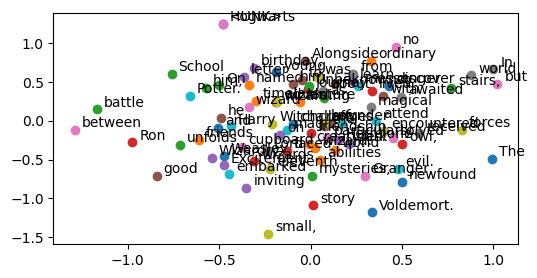

In [385]:
plt.figure(figsize=(6, 3))
for i, word in enumerate(vocab):
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [386]:
wizard=get_embed('wizard')
wizard

(-0.338287889957428, 0.17679618299007416)

In [387]:
faced=get_embed('faced')
faced

(-0.1288096308708191, -0.38254809379577637)

In [388]:
np.array(wizard) @ np.array(faced)

-0.024058304559737564

In [389]:
unk=get_embed('<UNK>')
unk

(-0.4802992343902588, 1.2521966695785522)

In [390]:
def cosine_similarity(A, B):
    dot_product = np.dot(A, B)
    norm_a = np.linalg.norm(A)
    norm_b = np.linalg.norm(B)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

print(cosine_similarity(np.array(wizard), np.array(faced)))
print(cosine_similarity(np.array(wizard), np.array(unk)))

-0.15614737008085341
0.7498521541286548


GloVe

In [391]:
vocab.append('<UNK>')

In [392]:
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him',
 '<UNK>',
 '<UNK>']

In [393]:
word2index['<UNK>'] = 0

In [394]:
index2word = {v:k for k, v in word2index.items()} 

In [395]:
from collections import Counter

X_i = Counter(flatten(corpus))
X_i

Counter({'and': 8,
         'a': 6,
         'the': 6,
         'Harry': 3,
         'to': 3,
         'his': 3,
         'of': 3,
         'boy': 2,
         'he': 2,
         'him': 2,
         'magical': 2,
         'dark': 2,
         'In': 1,
         'small,': 1,
         'cupboard': 1,
         'under': 1,
         'stairs,': 1,
         'lived': 1,
         'young': 1,
         'named': 1,
         'Potter.': 1,
         'Unbeknownst': 1,
         'him,': 1,
         'was': 1,
         'no': 1,
         'ordinary': 1,
         'but': 1,
         'wizard.': 1,
         'On': 1,
         'eleventh': 1,
         'birthday,': 1,
         'received': 1,
         'letter': 1,
         'from': 1,
         'messenger': 1,
         'owl,': 1,
         'inviting': 1,
         'attend': 1,
         'Hogwarts': 1,
         'School': 1,
         'Witchcraft': 1,
         'Wizardry.': 1,
         'Excitement': 1,
         'adventure': 1,
         'awaited': 1,
         'as': 1,
         'emb

In [396]:
skip_grams = []

for doc in corpus:
    for i in range(1, len(doc)-1):
        center = doc[i]
        outside = [doc[i-1], doc[i+1]]
        for each_out in outside:
            skip_grams.append((center, each_out))
skip_grams

[('a', 'In'),
 ('a', 'small,'),
 ('small,', 'a'),
 ('small,', 'cupboard'),
 ('cupboard', 'small,'),
 ('cupboard', 'under'),
 ('under', 'cupboard'),
 ('under', 'the'),
 ('the', 'under'),
 ('the', 'stairs,'),
 ('stairs,', 'the'),
 ('stairs,', 'lived'),
 ('lived', 'stairs,'),
 ('lived', 'a'),
 ('a', 'lived'),
 ('a', 'young'),
 ('young', 'a'),
 ('young', 'boy'),
 ('boy', 'young'),
 ('boy', 'named'),
 ('named', 'boy'),
 ('named', 'Harry'),
 ('Harry', 'named'),
 ('Harry', 'Potter.'),
 ('Potter.', 'Harry'),
 ('Potter.', 'Unbeknownst'),
 ('Unbeknownst', 'Potter.'),
 ('Unbeknownst', 'to'),
 ('to', 'Unbeknownst'),
 ('to', 'him,'),
 ('him,', 'to'),
 ('him,', 'he'),
 ('he', 'him,'),
 ('he', 'was'),
 ('was', 'he'),
 ('was', 'no'),
 ('no', 'was'),
 ('no', 'ordinary'),
 ('ordinary', 'no'),
 ('ordinary', 'boy'),
 ('boy', 'ordinary'),
 ('boy', 'but'),
 ('but', 'boy'),
 ('but', 'a'),
 ('a', 'but'),
 ('a', 'wizard.'),
 ('wizard.', 'a'),
 ('wizard.', 'On'),
 ('On', 'wizard.'),
 ('On', 'his'),
 ('his', 'On

In [397]:
X_ik_skipgrams = Counter(skip_grams)
X_ik_skipgrams

Counter({('the', 'dark'): 2,
         ('dark', 'the'): 2,
         ('a', 'In'): 1,
         ('a', 'small,'): 1,
         ('small,', 'a'): 1,
         ('small,', 'cupboard'): 1,
         ('cupboard', 'small,'): 1,
         ('cupboard', 'under'): 1,
         ('under', 'cupboard'): 1,
         ('under', 'the'): 1,
         ('the', 'under'): 1,
         ('the', 'stairs,'): 1,
         ('stairs,', 'the'): 1,
         ('stairs,', 'lived'): 1,
         ('lived', 'stairs,'): 1,
         ('lived', 'a'): 1,
         ('a', 'lived'): 1,
         ('a', 'young'): 1,
         ('young', 'a'): 1,
         ('young', 'boy'): 1,
         ('boy', 'young'): 1,
         ('boy', 'named'): 1,
         ('named', 'boy'): 1,
         ('named', 'Harry'): 1,
         ('Harry', 'named'): 1,
         ('Harry', 'Potter.'): 1,
         ('Potter.', 'Harry'): 1,
         ('Potter.', 'Unbeknownst'): 1,
         ('Unbeknownst', 'Potter.'): 1,
         ('Unbeknownst', 'to'): 1,
         ('to', 'Unbeknownst'): 1,
         ('

In [398]:
def weighting(w_i, w_j, X_ik):
    
    #check whether the co-occurences between w_i and w_j is available
    try:
        x_ij = X_ik[(w_i, w_j)]
        #if not exist, then set to 1 "laplace smoothing"
    except:
        x_ij = 1
        
    #set xmax
    x_max = 100
    #set alpha
    alpha = 0.75
    
    #if co-ocurrence does not exceeed xmax, then just multiply with some alpha
    if x_ij < x_max:
        result = (x_ij / x_max)**alpha
    #otherwise, set to 1
    else:
        result = 1
    
    return result

In [399]:
from itertools import combinations_with_replacement

X_ik = {} #keeping the co-occurences
weighting_dic = {} #already scale the co-occurences using the weighting function

for bigram in combinations_with_replacement(vocab, 2):
    if X_ik_skipgrams.get(bigram):  #if the pair exists in our corpus
        co = X_ik_skipgrams[bigram]
        X_ik[bigram] = co + 1 #for stability
        X_ik[(bigram[1], bigram[0])] = co + 1 #basically apple, banana = banana, apple
    else:
        pass
    
    weighting_dic[bigram] = weighting(bigram[0], bigram[1], X_ik)
    weighting_dic[(bigram[1], bigram[0])] = weighting(bigram[1], bigram[0], X_ik)

In [400]:
import math

def random_batch(batch_size, word_sequence, skip_grams, X_ik, weighting_dic):
    
    random_inputs, random_labels, random_coocs, random_weightings = [], [], [], []
    
    #convert our skipgrams to id
    skip_grams_id = [(word2index[skip_gram[0]], word2index[skip_gram[1]]) for skip_gram in skip_grams]
    
    #randomly choose indexes based on batch size
    random_index = np.random.choice(range(len(skip_grams_id)), batch_size, replace=False)
    
    #get the random input and labels
    for index in random_index:
        random_inputs.append([skip_grams_id[index][0]])
        random_labels.append([skip_grams_id[index][1]])
        #coocs
        pair = skip_grams[index] #e.g., ('banana', 'fruit')
        try:
            cooc = X_ik[pair]
        except:
            cooc = 1
        random_coocs.append([math.log(cooc)])
    
        #weightings
        weighting = weighting_dic[pair]
        random_weightings.append([weighting])
        
    return np.array(random_inputs), np.array(random_labels), np.array(random_coocs), np.array(random_weightings)

In [401]:
batch_size=2
x, y, cooc, weighting = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic)


In [402]:
x

array([[12],
       [73]])

In [403]:
y

array([[ 0],
       [40]])

In [404]:
cooc

array([[0.69314718],
       [0.69314718]])

In [405]:
weighting

array([[0.05318296],
       [0.05318296]])

In [406]:
class Glove(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Glove, self).__init__()
        self.center_embedding  = nn.Embedding(voc_size, emb_size)
        self.outside_embedding = nn.Embedding(voc_size, emb_size)
        
        self.center_bias       = nn.Embedding(voc_size, 1) 
        self.outside_bias      = nn.Embedding(voc_size, 1)
    
    def forward(self, center, outside, coocs, weighting):
        center_embeds  = self.center_embedding(center) #(batch_size, 1, emb_size)
        outside_embeds = self.outside_embedding(outside) #(batch_size, 1, emb_size)
        
        center_bias    = self.center_bias(center).squeeze(1)
        target_bias    = self.outside_bias(outside).squeeze(1)
        
        inner_product  = outside_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) = (batch_size, 1)
        
        loss = weighting * torch.pow(inner_product + center_bias + target_bias - coocs, 2)
        
        return torch.sum(loss)

In [407]:
voc_size = len(vocab)
emb_size = 2
model = Glove(voc_size, emb_size)

In [408]:
x_tensor = torch.LongTensor(x)
y_tensor = torch.LongTensor(y)
cooc_tensor = torch.FloatTensor(cooc)
weighting_tensor = torch.FloatTensor(weighting)

In [409]:

loss = model(x_tensor, y_tensor, cooc_tensor, weighting_tensor)

In [410]:
loss

tensor(0.0877, grad_fn=<SumBackward0>)

In [411]:
batch_size     = 10 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Glove(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [412]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [413]:
import time

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch, cooc_batch, weighting_batch = random_batch(batch_size, corpus, skip_grams, X_ik, weighting_dic)
    input_batch  = torch.LongTensor(input_batch)         #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch)        #[batch_size, 1]
    cooc_batch   = torch.FloatTensor(cooc_batch)         #[batch_size, 1]
    weighting_batch = torch.FloatTensor(weighting_batch) #[batch_size, 1]
    
    optimizer.zero_grad()
    loss = model(input_batch, target_batch, cooc_batch, weighting_batch)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 1.240355 | time: 0m 0s
Epoch: 2000 | cost: 0.211657 | time: 0m 0s
Epoch: 3000 | cost: 0.072201 | time: 0m 0s
Epoch: 4000 | cost: 0.148230 | time: 0m 0s
Epoch: 5000 | cost: 0.235763 | time: 0m 0s
Epoch: 6000 | cost: 0.003181 | time: 0m 0s
Epoch: 7000 | cost: 0.009267 | time: 0m 0s
Epoch: 8000 | cost: 0.000766 | time: 0m 0s
Epoch: 9000 | cost: 0.000147 | time: 0m 0s
Epoch: 10000 | cost: 0.000018 | time: 0m 0s


In [414]:
vocab[:10]

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,']

In [415]:
word = vocab[0]

In [416]:
#numericalization
id = word2index[word]
id

0

In [417]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [418]:
v_embed = model.center_embedding(id_tensor)
u_embed = model.outside_embedding(id_tensor)

v_embed, u_embed

(tensor([[0.0689, 1.1517]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.1203,  0.1466]], grad_fn=<EmbeddingBackward0>))

In [419]:
#average to get the word embedding
word_embed = (v_embed + u_embed) / 2
word_embed

tensor([[-0.5257,  0.6492]], grad_fn=<DivBackward0>)

In [420]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.center_embedding(id_tensor)
    u_embed = model.outside_embedding(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

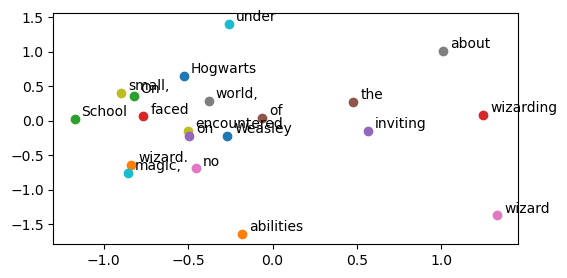

In [421]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [422]:
vocab

['Hogwarts',
 'wizard.',
 'On',
 'wizarding',
 'inviting',
 'the',
 'no',
 'world,',
 'encountered',
 'magic,',
 'Weasley',
 'abilities',
 'School',
 'faced',
 'on',
 'of',
 'wizard',
 'about',
 'small,',
 'under',
 'newfound',
 'world',
 'mysteries,',
 'wizards',
 'letter',
 'to',
 'solved',
 'from',
 'forces',
 'messenger',
 'discover',
 'creatures.',
 'him,',
 'journey',
 'Hermione',
 'a',
 'particularly',
 'In',
 'boy',
 'embarked',
 'The',
 'ordinary',
 'stairs,',
 'Ron',
 'Excitement',
 'good',
 'but',
 'magical',
 'was',
 'evil.',
 'Voldemort.',
 'timeless',
 'battle',
 'owl,',
 'dark',
 'Alongside',
 'between',
 'awaited',
 'adventure',
 'attend',
 'challenges,',
 'friends',
 'Unbeknownst',
 'lived',
 'learn',
 'with',
 'cupboard',
 'received',
 'eleventh',
 'Harry',
 'young',
 'his',
 'unfolds',
 'story',
 'birthday,',
 'he',
 'Granger,',
 'Lord',
 'Witchcraft',
 'Potter.',
 'and',
 'named',
 'as',
 'friendship,',
 'Wizardry.',
 'him',
 '<UNK>',
 '<UNK>']

In [423]:
wizard=get_embed('wizard')
faced=get_embed('faced')


In [424]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim
    
print(f"wizard vs. faced: ",        cos_sim(wizard, faced))


wizard vs. faced:  -0.7532893666027048


In [425]:
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"wizard vs. faced: ",        cos_sim(wizard, faced))

wizard vs. faced:  -0.7532893666027047
